In [160]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from category_encoders import MEstimateEncoder

In [161]:
data = pd.read_csv('./train.csv',  index_col='PassengerId')

In [162]:
data.drop(columns=['Name', 'Ticket'], inplace=True, axis=1)


In [163]:
imputer = SimpleImputer(missing_values=np.nan , strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])

In [164]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data['Cabin'] = imputer.fit_transform(data[['Cabin']])

In [165]:
data.Embarked.fillna(data.Embarked.mode()[0], inplace=True)

In [166]:
data['family_members'] = data['SibSp'] + data['Parch']

In [167]:
data.drop(columns=['SibSp', 'Parch'], axis='columns', inplace=True)

In [168]:
X = data.drop(['Survived'], axis='columns')
y = data.Survived


In [169]:
encoder = MEstimateEncoder(cols=['Sex', 'Embarked', 'Cabin'], m=0.5)
encoder.fit(X, y)
X = encoder.transform(X)


In [170]:
X

,Pclass,Sex,Age,Fare,Cabin,Embarked,family_members
PassengerId,,,,,,,
1,3,0.189077,22.000000,7.2500,0.303965,0.339044,1
2,1,0.741469,38.000000,71.2833,0.794613,0.553068,1
3,3,0.741469,26.000000,7.9250,0.303965,0.339044,0
4,1,0.741469,35.000000,53.1000,0.476768,0.339044,1
5,3,0.189077,35.000000,8.0500,0.303965,0.339044,0
...,...,...,...,...,...,...,...
887,2,0.189077,27.000000,13.0000,0.303965,0.339044,0
888,1,0.741469,19.000000,30.0000,0.794613,0.339044,0
889,3,0.741469,29.699118,23.4500,0.303965,0.339044,3


In [171]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X = scalar.fit_transform(X)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True)

In [173]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [178]:
accuracy_score(y_train, clf.predict(X_train))

0.8328651685393258

In [174]:
accuracy_score(y_test, clf.predict(X_test))

0.8770949720670391

In [175]:
scores = cross_val_score(clf, X_train, y_train, cv=10)

In [176]:
sum(scores)/len(scores)

0.82179186228482

In [177]:
scores1 = cross_val_score(clf, X_test, y_test)
sum(scores1)/len(scores1)

0.871904761904762

In [181]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test , clf.predict(X_test))

0.12290502793296089

In [182]:
from sklearn.metrics import r2_score
r2_score(y_test, clf.predict(X_test))

0.4951282051282052

In [183]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, clf.predict(X_test))

0.12290502793296089

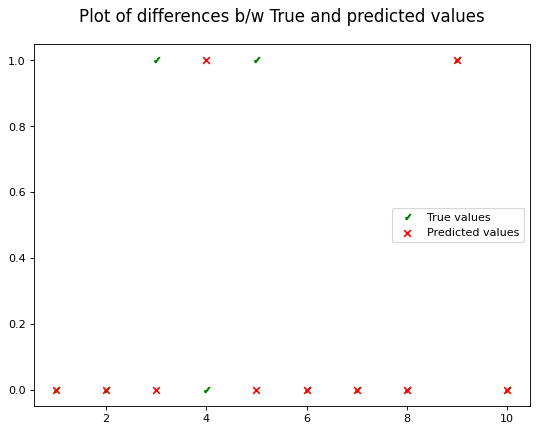

In [188]:
model = clf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(8,6), dpi=80)
true_vals = np.array(y_test[:10])
predicted = np.array(model.predict(X_test)[:10])
#X = range(1, 10+1)
plt.scatter(X, true_vals, color='green', label='True values', marker='$✓$')
plt.scatter(X, predicted, color='red', label='Predicted values', marker='x')
plt.title('Plot of differences b/w True and predicted values', fontsize=15, pad=20)
plt.legend()
